In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from string import punctuation
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df_raw = pd.read_csv(r'C:\Users\batman\Desktop\Internship\Email Spam detection\messages.csv')
df_raw

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [7]:
#let's separate the x and y variable into train and test data
x = df_raw.iloc[:,:2]
y = df_raw.loc[:,'label']
print(x,y)

                                                subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  
0     content - length : 3386 apple-iss research cen...  
1     lang classification grimes , joseph e . and ba...  
2     i am posting this inquiry for sergei atamas ( ...  
3     a colleague and i are researching the differin...  
4

In [8]:
#stats regarding the results columns
spam = df_raw['label'][df_raw['label']==0].value_counts()
ham = df_raw['label'][df_raw['label']==1].value_counts()
print("Count of spam : {} \nCount of ham : {}".format(spam,ham))

Count of spam : 0    2412
Name: label, dtype: int64 
Count of ham : 1    481
Name: label, dtype: int64


Ham ratio :  83.0 %
Spam ratio :  17.0 %


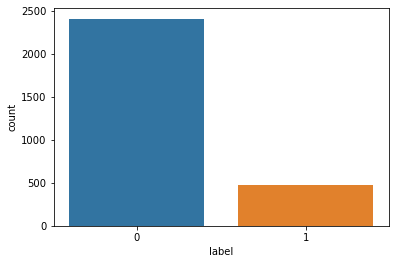

In [9]:
#Visualization
sns.countplot(x='label',data=df_raw)
plt.plot()

print('Ham ratio : ',round(len(df_raw[df_raw['label']==0])/len(df_raw.label),2)*100,'%')
print('Spam ratio : ',round(len(df_raw[df_raw['label']==1])/len(df_raw.label),2)*100,'%')

In [10]:
#calculating the length of messages
df_raw['original length']=df_raw.message.str.len()
df_raw.head(5)

,subject,message,label,original length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [11]:
df_raw.drop(columns='subject',inplace=True)
df_raw.head()

,message,label,original length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [12]:
#cleaning the data
df_raw['message'] = df_raw.message.str.lower()
df_raw.head()

,message,label,original length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [13]:
#using the regular expression to clean data

#removing the email address
df_raw['message'] = df_raw['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailadress')

#replacing URLs with 'webaddress'
df_raw['message'] = df_raw['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#replacing money symbol
df_raw['message'] = df_raw['message'].str.replace(r'£|\$','dollars')

#replacing 10 digits phone number
df_raw['message'] = df_raw['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replacing number with 'num'
df_raw['message'] = df_raw['message'].str.replace(r'\d+(\.\d+)?','num')

#removing punctuation 
df_raw['message'] = df_raw['message'].str.replace(r'[^\w\d\s]',' ')

#replacing whitespace 
df_raw['message'] = df_raw['message'].str.replace(r'^\s+',' ')

#removing leading and trailing whitespace
df_raw['message'] = df_raw['message'].str.replace(r'^\s+|\s+?$','')

In [14]:
#removing stop words
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english') + ['u','i','e','f','xvi','sil','org','t','c','edu','iss'])

df_raw['message'] = df_raw['message'].apply(lambda x : ' '.join(w for w in x.split() if w not in stop_words))

In [15]:
#cleaned data
df_raw['cleaned length'] = df_raw.message.str.len()
df_raw.head(5)

,message,label,original length,cleaned length
0,content length num apple research center us do...,0,2856,2129
1,lang classification grimes joseph barbara grim...,0,1800,1380
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1014
3,colleague researching differing degrees risk p...,0,324,210
4,earlier morning phone friend mine living south...,0,1046,625


In [16]:

print('Original length : ',df_raw['original length'].sum())
print('Cleaned length : ',df_raw['cleaned length'].sum())
print('Change in number of words : {}'.format(df_raw['original length'].sum()-df_raw['cleaned length'].sum()))

Original length :  9344743
Cleaned length :  6580922
Change in number of words : 2763821


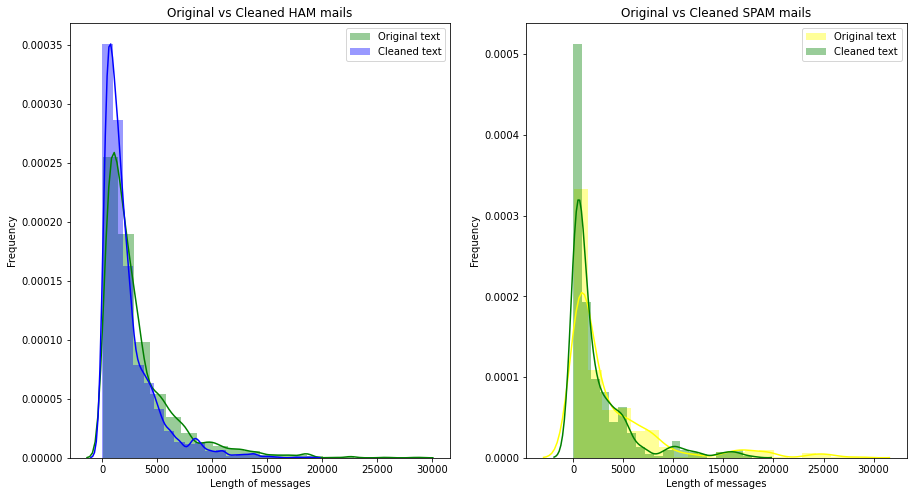

In [17]:
#visualization of data


#subplots
fig ,ax = plt.subplots(1,2,figsize=(15,8))

#HAM mails 
sns.distplot(df_raw[df_raw['label']==0]['original length'],ax=ax[0],bins=20,color='green')
sns.distplot(df_raw[df_raw['label']==0]['cleaned length'],ax=ax[0],bins=20,color='blue')
ax[0].set_xlabel('Length of messages')
ax[0].set_ylabel('Frequency')
ax[0].legend(['Original text','Cleaned text'])
ax[0].set_title('Original vs Cleaned HAM mails')


#SPAM mails
sns.distplot(df_raw[df_raw['label']==1]['original length'],ax=ax[1],bins=20,color='yellow')
sns.distplot(df_raw[df_raw['label']==1]['cleaned length'],ax=ax[1],bins=20,color='green')
ax[1].set_xlabel('Length of messages')
ax[1].set_ylabel('Frequency')
ax[1].legend(['Original text','Cleaned text'])
ax[1].set_title('Original vs Cleaned SPAM mails')

fig.show()

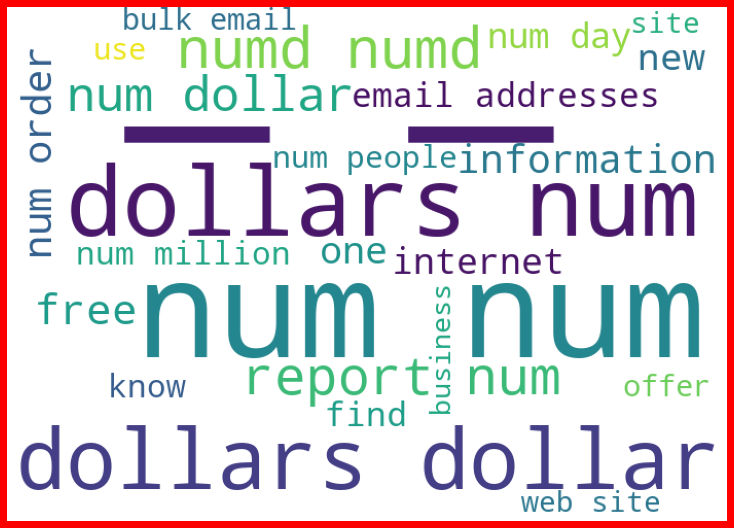

In [18]:
from wordcloud import WordCloud

#for spam messages
spam_msg = df_raw[df_raw['label']==1]
spam_cloud = WordCloud(width=700,height=500,background_color = 'white',max_words=25).generate(' '.join(spam_msg.message))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

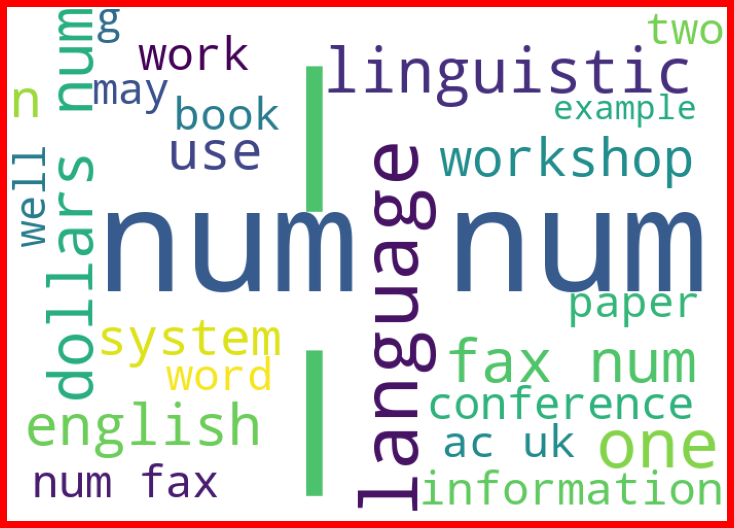

In [19]:
#For HAM messages
spam_msg = df_raw[df_raw['label']==0]
spam_cloud = WordCloud(width=700,height=500,background_color = 'white',max_words=25).generate(' '.join(spam_msg.message))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [21]:
#converting text into vectors
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df_raw['message'])
x = features
y =  df_raw['label']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2169, 54995) (2169,)
(724, 54995) (724,)


In [23]:
#checking the accuracy score

models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]
for m in models:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    acc_score = accuracy_score(y_test,pred)
    rep = classification_report(y_test,pred)
    print('For model {} \nAccuracy score : {} \nClassification Report : {} \n*********************'.format(m,acc_score,rep))

For model LogisticRegression() 
Accuracy score : 0.9461325966850829 
Classification Report :               precision    recall  f1-score   support

           0       0.94      1.00      0.97       585
           1       0.99      0.73      0.84       139

    accuracy                           0.95       724
   macro avg       0.96      0.86      0.90       724
weighted avg       0.95      0.95      0.94       724
 
*********************
For model DecisionTreeClassifier() 
Accuracy score : 0.9571823204419889 
Classification Report :               precision    recall  f1-score   support

           0       0.96      0.98      0.97       585
           1       0.93      0.84      0.88       139

    accuracy                           0.96       724
   macro avg       0.95      0.91      0.93       724
weighted avg       0.96      0.96      0.96       724
 
*********************
For model RandomForestClassifier() 
Accuracy score : 0.9737569060773481 
Classification Report :              

In [24]:
#checking cross validation score

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for m in models:
    cvs = cross_val_score(m,x,y,cv=skf,scoring='accuracy').mean()
    print('Cross validation score : ', cvs , 'for model : ',m)

Cross validation score :  0.9588665579002097 for model :  LogisticRegression()
Cross validation score :  0.9536792345709999 for model :  DecisionTreeClassifier()
Cross validation score :  0.9730390662818007 for model :  RandomForestClassifier()
Cross validation score :  0.9740771285655377 for model :  SVC()
Cross validation score :  0.9716513975294475 for model :  KNeighborsClassifier()
Cross validation score :  0.8600098009334791 for model :  MultinomialNB()


In [25]:
#defining the a funnction to find the best parameter
def best_parameter(model,para):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grd = GridSearchCV(model,para,cv=skf)
    grd.fit(x,y)
    return [grd.best_params_, grd.best_score_]

In [26]:
#KNN, SVC and Random Forest Classifier are showing the best accuracy

# 1) Random Forest Classifier
model = RandomForestClassifier()
para = {
    'n_estimators':list(range(1,20)),
    'criterion':['gini','ensemble']
}
best_parameter(model,para)

[{'criterion': 'gini', 'n_estimators': 17}, 0.9699260746663798]

In [27]:
# 2) KNN

knn = KNeighborsClassifier()
params = {
    'n_neighbors':list(range(1,16,2)),
    'weights':['uniform','distance'],
    'algorithm':['auto','bull_tree','kd_tree','brute']
}
best_parameter(knn,params)

[{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'},
 0.9751074218166389]

In [28]:
# 3) SVC
svc = SVC()
params = {
    'degree':[2,3,4],
    'gamma':['scale','auto'],
    'kernel':['rbf','linear','poly']
}

best_parameter(svc,params)

[{'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, 0.9879018233321979]

In [30]:
#again checking the classification report
models = [RandomForestClassifier(criterion= 'gini',n_estimators= 17),SVC(degree = 2, gamma = 'scale',kernel='linear'),KNeighborsClassifier(algorithm= 'auto', n_neighbors= 3, weights= 'distance')]
for m in models:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    acc_score = accuracy_score(y_test,pred)
    rep = classification_report(y_test,pred)
    print('For model {} \nAccuracy score : {} \nClassification Report : {} \n*********************'.format(m,acc_score,rep))

For model RandomForestClassifier(n_estimators=17) 
Accuracy score : 0.9696132596685083 
Classification Report :               precision    recall  f1-score   support

           0       0.96      1.00      0.98       585
           1       1.00      0.84      0.91       139

    accuracy                           0.97       724
   macro avg       0.98      0.92      0.95       724
weighted avg       0.97      0.97      0.97       724
 
*********************
For model SVC(degree=2, kernel='linear') 
Accuracy score : 0.9875690607734806 
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      0.99       585
           1       0.99      0.94      0.97       139

    accuracy                           0.99       724
   macro avg       0.99      0.97      0.98       724
weighted avg       0.99      0.99      0.99       724
 
*********************
For model KNeighborsClassifier(n_neighbors=3, weights='distance') 
Accuracy score : 0

We can see that SVC has the best result as:
    SPAM detection accuracy = 99%
    HAM detection accuracy = 97%

In [31]:
#finalizing the model
svc = SVC(degree = 2, gamma = 'scale',kernel='linear')

In [32]:
#saving the file
import joblib 
joblib.dump(svc,'Email_Spam.obj')

['Email_Spam.obj']